In [201]:
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent.parent))

from src.data.preprocessors import *
%load_ext autoreload
%autoreload 2

import polars as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
import warnings
warnings.simplefilter('ignore')
sns.set_theme(context='notebook', style=plt.style.use('dark_background')) # type: ignore

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [183]:
# 1. Cargar el archivo YAML
yaml_path = '../../config/features_names.yaml'  # Cambia esto por la ruta de tu archivo
with open(yaml_path, 'r', encoding='utf-8') as file:
    column_mapping = yaml.safe_load(file)['features']  # Carga solo la secci√≥n de 'features'

# 2. Lectura de los datos provisionales
data = pl.scan_parquet('../../data/interim/data_interim.parquet').collect()

# 3. Renombrar las columnas seg√∫n el YAML
data = data.rename(column_mapping)
data.sample(5, seed=42)

shape: (5, 30)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ country   ‚îÜ state      ‚îÜ city       ‚îÜ target ‚îÜ ‚Ä¶ ‚îÜ initial_q ‚îÜ start_tim ‚îÜ sold_quan ‚îÜ available ‚îÇ
‚îÇ ---       ‚îÜ ---        ‚îÜ ---        ‚îÜ ---    ‚îÜ   ‚îÜ uantity   ‚îÜ e         ‚îÜ tity      ‚îÜ _quantity ‚îÇ
‚îÇ str       ‚îÜ str        ‚îÜ str        ‚îÜ str    ‚îÜ   ‚îÜ ---       ‚îÜ ---       ‚îÜ ---       ‚îÜ ---       ‚îÇ
‚îÇ           ‚îÜ            ‚îÜ            ‚îÜ        ‚îÜ   ‚îÜ i64       ‚îÜ datetime[ ‚îÜ i64       ‚îÜ i64       ‚îÇ
‚îÇ           ‚îÜ            ‚îÜ            ‚îÜ        ‚îÜ   ‚îÜ           ‚îÜ ms]       ‚îÜ           ‚îÜ           ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ argentina ‚îÜ buenos     ‚îÜ campana    ‚îÜ used   ‚îÜ ‚Ä¶ ‚îÜ 1         ‚îÜ 2015-10-0 ‚îÜ 0         ‚îÜ 1         ‚îÇ
‚îÇ           ‚îÜ aires      ‚îÜ            ‚îÜ        ‚îÜ   ‚îÜ           ‚îÜ 7         ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ           ‚îÜ            ‚îÜ            ‚îÜ        ‚îÜ   ‚îÜ           ‚îÜ 13:37:27  ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ argentina ‚îÜ buenos     ‚îÜ pilar      ‚îÜ new    ‚îÜ ‚Ä¶ ‚îÜ 1         ‚îÜ 2015-09-2 ‚îÜ 0         ‚îÜ 1         ‚îÇ
‚îÇ           ‚îÜ aires      ‚îÜ            ‚îÜ        ‚îÜ   ‚îÜ           ‚îÜ 9         ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ           ‚îÜ            ‚îÜ            ‚îÜ        ‚îÜ   ‚îÜ           ‚îÜ 15:12:15  ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ argentina ‚îÜ santa fe   ‚îÜ rosario    ‚îÜ new    ‚îÜ ‚Ä¶ ‚îÜ 597       ‚îÜ 2015-10-0 ‚îÜ 4         ‚îÜ 597       ‚îÇ
‚îÇ           ‚îÜ            ‚îÜ            ‚îÜ        ‚îÜ   ‚îÜ           ‚îÜ 6         ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ           ‚îÜ            ‚îÜ            ‚îÜ        ‚îÜ   ‚îÜ           ‚îÜ 12:30:46  ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ argentina ‚îÜ buenos     ‚îÜ almirante  ‚îÜ used   ‚îÜ ‚Ä¶ ‚îÜ 1         ‚îÜ 2015-08-0 ‚îÜ 0         ‚îÜ 1         ‚îÇ
‚îÇ           ‚îÜ aires      ‚îÜ brown      ‚îÜ        ‚îÜ   ‚îÜ           ‚îÜ 3         ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ           ‚îÜ            ‚îÜ            ‚îÜ        ‚îÜ   ‚îÜ           ‚îÜ 23:44:28  ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ argentina ‚îÜ capital    ‚îÜ saavedra   ‚îÜ used   ‚îÜ ‚Ä¶ ‚îÜ 1         ‚îÜ 2015-10-1 ‚îÜ 0         ‚îÜ 1         ‚îÇ
‚îÇ           ‚îÜ federal    ‚îÜ            ‚îÜ        ‚îÜ   ‚îÜ           ‚îÜ 4         ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ           ‚îÜ            ‚îÜ            ‚îÜ        ‚îÜ   ‚îÜ           ‚îÜ 12:46:58  ‚îÜ           ‚îÜ           ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [56]:
# Producto que sea nuevo y usado como mismo evento
result = (
    data.group_by('product_id')
    .agg(pl.n_unique('target').alias('unique_conditions'))
    .filter(pl.col('unique_conditions') > 1)  # Filtra los productos con m√°s de una condici√≥n
)
result

shape: (0, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ product_id ‚îÜ unique_conditions ‚îÇ
‚îÇ ---        ‚îÜ ---               ‚îÇ
‚îÇ str        ‚îÜ u32               ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [101]:
# Producto que sea nuevo y usado como mismo evento
result = (
    data.group_by('product_id')
    .agg(pl.n_unique('last_updated').alias('n_unique'))
    .filter(pl.col('n_unique') > 1)  # Filtra los productos con m√°s de una condici√≥n
)
result

shape: (0, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ product_id ‚îÜ n_unique ‚îÇ
‚îÇ ---        ‚îÜ ---      ‚îÇ
‚îÇ str        ‚îÜ u32      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [33]:
# Producto que sea nuevo y usado como mismo evento
# Conclusi√≥n: todos los productos son nuevos o usados con el mismo product_id
data.filter((pl.col('target') == 'new') & (pl.col('target') == 'used')).select('product_id')

shape: (0, 1)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ product_id ‚îÇ
‚îÇ ---        ‚îÇ
‚îÇ str        ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [58]:
# El precio es constante en todas las transacciones
sample = data.sample(1, seed=42).get_column('product_id')[0]
data.filter(pl.col('product_id') == sample).select('product_id', 'price', 'sold_quantity')

shape: (390, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ product_id    ‚îÜ price   ‚îÜ sold_quantity ‚îÇ
‚îÇ ---           ‚îÜ ---     ‚îÜ ---           ‚îÇ
‚îÇ str           ‚îÜ f64     ‚îÜ i64           ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ mla3538569648 ‚îÜ 88500.0 ‚îÜ 0             ‚îÇ
‚îÇ mla3538569648 ‚îÜ 88500.0 ‚îÜ 0             ‚îÇ
‚îÇ mla3538569648 ‚îÜ 88500.0 ‚îÜ 0             ‚îÇ
‚îÇ mla3538569648 ‚îÜ 88500.0 ‚îÜ 0             ‚îÇ
‚îÇ mla3538569648 ‚îÜ 88500.0 ‚îÜ 0             ‚îÇ
‚îÇ ‚Ä¶             ‚îÜ ‚Ä¶       ‚îÜ ‚Ä¶             ‚îÇ
‚îÇ mla3538569648 ‚îÜ 88500.0 ‚îÜ 0             ‚îÇ
‚îÇ mla3538569648 ‚îÜ 88500.0 ‚îÜ 0             ‚îÇ
‚îÇ mla3538569648 ‚îÜ 88500.0 ‚îÜ 0             ‚îÇ
‚îÇ mla3538569648 ‚îÜ 88500.0 ‚îÜ 0             ‚îÇ
‚îÇ mla3538569648 ‚îÜ 88500.0 ‚îÜ 0             ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [117]:
# El precio, cantidades, data_created, last_updated es constante en todas las transacciones
sample = data.sample(1, seed=85).get_column('product_id')[0]
data.filter(pl.col('product_id') == sample).select('product_id', 'price', 'sold_quantity', 'initial_quantity', 'available_quantity', 'date_created', 'last_updated')

shape: (180, 7)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ product_id    ‚îÜ price ‚îÜ sold_quantit ‚îÜ initial_quan ‚îÜ available_qu ‚îÜ date_created ‚îÜ last_updated ‚îÇ
‚îÇ ---           ‚îÜ ---   ‚îÜ y            ‚îÜ tity         ‚îÜ antity       ‚îÜ ---          ‚îÜ ---          ‚îÇ
‚îÇ str           ‚îÜ f64   ‚îÜ ---          ‚îÜ ---          ‚îÜ ---          ‚îÜ datetime[ms] ‚îÜ datetime[ms] ‚îÇ
‚îÇ               ‚îÜ       ‚îÜ i64          ‚îÜ i64          ‚îÜ i64          ‚îÜ              ‚îÜ              ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ mla5672241252 ‚îÜ 50.0  ‚îÜ 0            ‚îÜ 5            ‚îÜ 5            ‚îÜ 2015-08-18   ‚îÜ 2015-09-18   ‚îÇ
‚îÇ               ‚îÜ       ‚îÜ              ‚îÜ              ‚îÜ              ‚îÜ 11:26:50     ‚îÜ 13:21:35     ‚îÇ
‚îÇ mla5672241252 ‚îÜ 50.0  ‚îÜ 0            ‚îÜ 5            ‚îÜ 5            ‚îÜ 2015-08-18   ‚îÜ 2015-09-18   ‚îÇ
‚îÇ               ‚îÜ       ‚îÜ              ‚îÜ              ‚îÜ              ‚îÜ 11:26:50     ‚îÜ 13:21:35     ‚îÇ
‚îÇ mla5672241252 ‚îÜ 50.0  ‚îÜ 0            ‚îÜ 5            ‚îÜ 5            ‚îÜ 2015-08-18   ‚îÜ 2015-09-18   ‚îÇ
‚îÇ               ‚îÜ       ‚îÜ              ‚îÜ              ‚îÜ              ‚îÜ 11:26:50     ‚îÜ 13:21:35     ‚îÇ
‚îÇ mla5672241252 ‚îÜ 50.0  ‚îÜ 0            ‚îÜ 5            ‚îÜ 5            ‚îÜ 2015-08-18   ‚îÜ 2015-09-18   ‚îÇ
‚îÇ               ‚îÜ       ‚îÜ              ‚îÜ              ‚îÜ              ‚îÜ 11:26:50     ‚îÜ 13:21:35     ‚îÇ
‚îÇ mla5672241252 ‚îÜ 50.0  ‚îÜ 0            ‚îÜ 5            ‚îÜ 5            ‚îÜ 2015-08-18   ‚îÜ 2015-09-18   ‚îÇ
‚îÇ               ‚îÜ       ‚îÜ              ‚îÜ              ‚îÜ              ‚îÜ 11:26:50     ‚îÜ 13:21:35     ‚îÇ
‚îÇ ‚Ä¶             ‚îÜ ‚Ä¶     ‚îÜ ‚Ä¶            ‚îÜ ‚Ä¶            ‚îÜ ‚Ä¶            ‚îÜ ‚Ä¶            ‚îÜ ‚Ä¶            ‚îÇ
‚îÇ mla5672241252 ‚îÜ 50.0  ‚îÜ 0            ‚îÜ 5            ‚îÜ 5            ‚îÜ 2015-08-18   ‚îÜ 2015-09-18   ‚îÇ
‚îÇ               ‚îÜ       ‚îÜ              ‚îÜ              ‚îÜ              ‚îÜ 11:26:50     ‚îÜ 13:21:35     ‚îÇ
‚îÇ mla5672241252 ‚îÜ 50.0  ‚îÜ 0            ‚îÜ 5            ‚îÜ 5            ‚îÜ 2015-08-18   ‚îÜ 2015-09-18   ‚îÇ
‚îÇ               ‚îÜ       ‚îÜ              ‚îÜ              ‚îÜ              ‚îÜ 11:26:50     ‚îÜ 13:21:35     ‚îÇ
‚îÇ mla5672241252 ‚îÜ 50.0  ‚îÜ 0            ‚îÜ 5            ‚îÜ 5            ‚îÜ 2015-08-18   ‚îÜ 2015-09-18   ‚îÇ
‚îÇ               ‚îÜ       ‚îÜ              ‚îÜ              ‚îÜ              ‚îÜ 11:26:50     ‚îÜ 13:21:35     ‚îÇ
‚îÇ mla5672241252 ‚îÜ 50.0  ‚îÜ 0            ‚îÜ 5            ‚îÜ 5            ‚îÜ 2015-08-18   ‚îÜ 2015-09-18   ‚îÇ
‚îÇ               ‚îÜ       ‚îÜ              ‚îÜ              ‚îÜ              ‚îÜ 11:26:50     ‚îÜ 13:21:35     ‚îÇ
‚îÇ mla5672241252 ‚îÜ 50.0  ‚îÜ 0            ‚îÜ 5            ‚îÜ 5            ‚îÜ 2015-08-18   ‚îÜ 2015-09-18   ‚îÇ
‚îÇ               ‚îÜ       ‚îÜ              ‚îÜ              ‚îÜ              ‚îÜ 11:26:50     ‚îÜ 13:21:35     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [91]:
data.schema

Schema([('country', String),
        ('state', String),
        ('city', String),
        ('target', String),
        ('price', Float64),
        ('local_pickup', Boolean),
        ('free_shipping', Boolean),
        ('shipping_mode', String),
        ('seller_id', Int64),
        ('site_id', String),
        ('listing_type', String),
        ('attribute_group_id', String),
        ('attribute_name', String),
        ('attribute_group', String),
        ('attribute_id', String),
        ('buying_mode', String),
        ('category_id', String),
        ('last_updated', Datetime(time_unit='ms', time_zone=None)),
        ('product_id', String),
        ('accepts_mercadopago', Boolean),
        ('currency', String),
        ('title', String),
        ('automatic_relist', Boolean),
        ('date_created', Datetime(time_unit='ms', time_zone=None)),
        ('stop_time', Datetime(time_unit='ms', time_zone=None)),
        ('status', String),
        ('initial_quantity', Int64),
        ('star

In [184]:
# Funci√≥n de agregaci√≥n
def aggregate_data(data: pl.LazyFrame, group_by_col: str) -> pl.LazyFrame:
    """
    Realiza la agregaci√≥n de datos sobre la columna de agrupaci√≥n especificada.

    Par√°metros:
    -----------
    data : pl.LazyFrame
        DataFrame en formato LazyFrame de Polars con los datos originales.
    group_by_col : str
        Nombre de la columna sobre la cual se har√° la agrupaci√≥n (product_id, seller_id, site_id).

    Retorna:
    --------
    pl.LazyFrame
        DataFrame con los datos agregados.
    """
    df_agg = (
        data.group_by(group_by_col)
        .agg([
            pl.col('target').mode().first().alias('condition'),
            pl.col('state').mode().explode().first().alias('state'),
            pl.col('city').mode().explode().first().alias('city'),
            pl.col('local_pickup').mode().explode().first().alias('local_pickup'),
            pl.col('free_shipping').mode().explode().first().alias('free_shipping'),
            pl.col('shipping_mode').mode().explode().first().alias('shipping_mode'),
            pl.col('listing_type').mode().explode().first().alias('listing_type'),
            pl.col('buying_mode').mode().explode().first().alias('buying_mode'),
            
            pl.col('attribute_group_id').mode().explode().first().alias('attribute_group_id'),
            pl.col('attribute_group').mode().explode().first().alias('attribute_group'),
            pl.col('attribute_id').mode().explode().first().alias('attribute_id'),
            
            pl.col('status').mode().explode().first().alias('status'),
            pl.col('accepts_mercadopago').mode().explode().first().alias('accepts_mercadopago'),
            pl.col('currency').mode().explode().first().alias('currency'),
            pl.col('automatic_relist').mode().explode().first().alias('automatic_relist'),
            
            pl.first('price').alias('unit_price'),  # Tomamos cualquier valor porque es constante
            pl.sum('sold_quantity').alias('total_quantity'),
            pl.sum('initial_quantity').alias('stock_quantity'),
            pl.sum('available_quantity').alias('available_quantity'),
            pl.first('last_updated').alias('last_updated'),
            pl.first('date_created').alias('date_created'),
            
            pl.first('start_time').alias('start_time'),
            pl.first('stop_time').alias('stop_time'),
        ])
        .with_columns(
            (pl.col('unit_price') * pl.col('total_quantity')).alias('total_amount'),
            ((pl.col('last_updated') - pl.col('date_created')).dt.total_seconds() / 3600).alias('date_difference_hr'),
            ((pl.col('stop_time') - pl.col('start_time')).dt.total_seconds() / 3600).alias('time_difference_hr')
        )#.drop(
            # ['unit_price', 'total_quantity', 'date_created', 'last_updated', 'start_time', 'stop_time']
        #)
    ).sort('total_amount', descending=True)
    
    return df_agg


# Aplicar la funci√≥n a diferentes niveles de agregaci√≥n
df_product = aggregate_data(data.lazy(), 'product_id').collect()
df_seller = aggregate_data(data.lazy(), 'seller_id').collect()
df_site = aggregate_data(data.lazy(), 'site_id').collect()

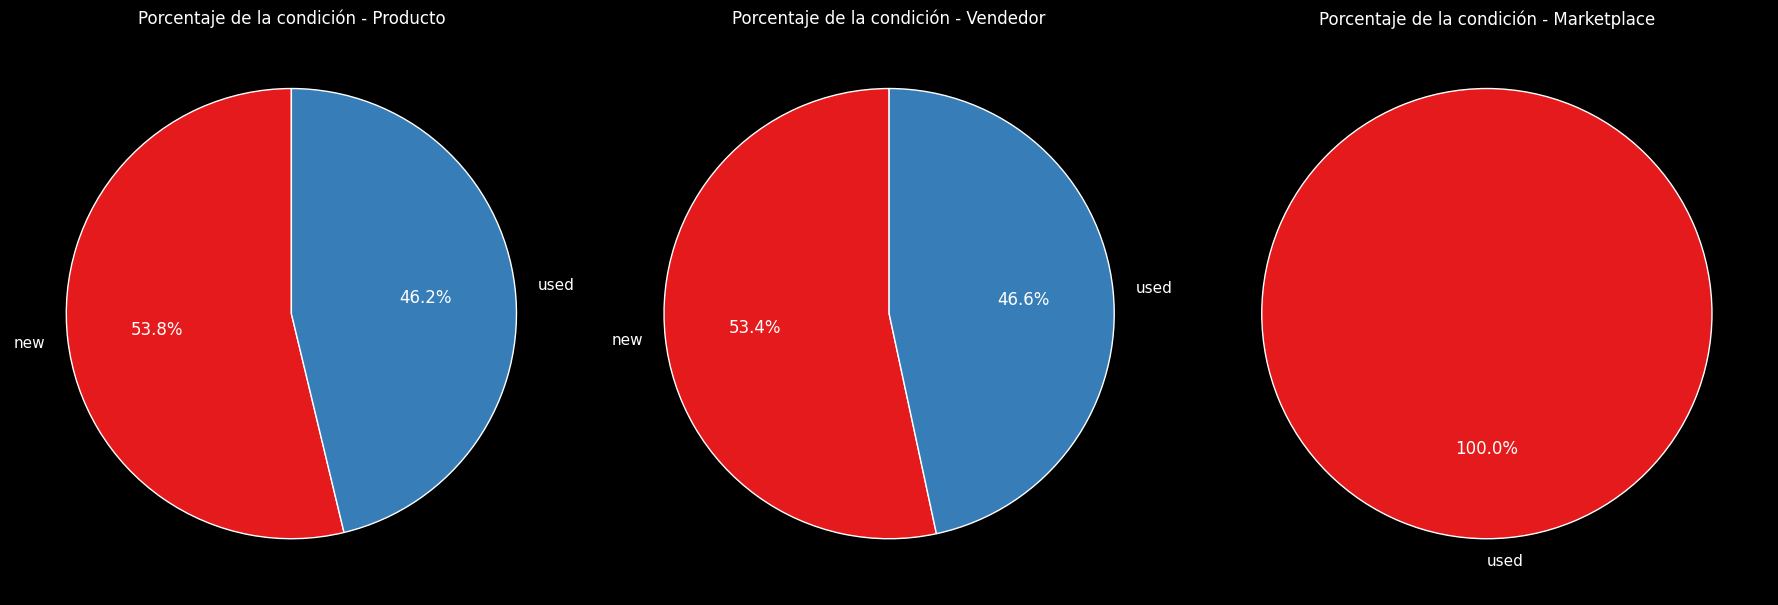

In [130]:
# Lista de DataFrames y sus t√≠tulos
dfs = [
    (df_product, 'Producto'),
    (df_seller, 'Vendedor'),
    (df_site, 'Marketplace')
]
VARIABLE = 'condition'

# Configurar la figura con 3 subgr√°ficos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Iterar sobre los DataFrames
for ax, (df, title) in zip(axes, dfs):
    # Calcular las frecuencias de los valores en 'condition'
    fraction_counts = df.select(pl.col(VARIABLE).value_counts()).unnest(VARIABLE)
    
    # Extraer etiquetas y valores
    fraction_labels = fraction_counts[VARIABLE].to_list()
    fraction_values = fraction_counts['count'].to_list()
    
    # Crear gr√°fico de pastel
    ax.pie(
        fraction_values,
        labels=fraction_labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Set1.colors,  # Paleta de colores similar a Set1 de seaborn
        wedgeprops={'edgecolor': 'white'}
    )
    ax.set_title(f'Porcentaje de la condici√≥n - {title}', fontsize=12)

# Ajustar el dise√±o
plt.tight_layout()
plt.show()

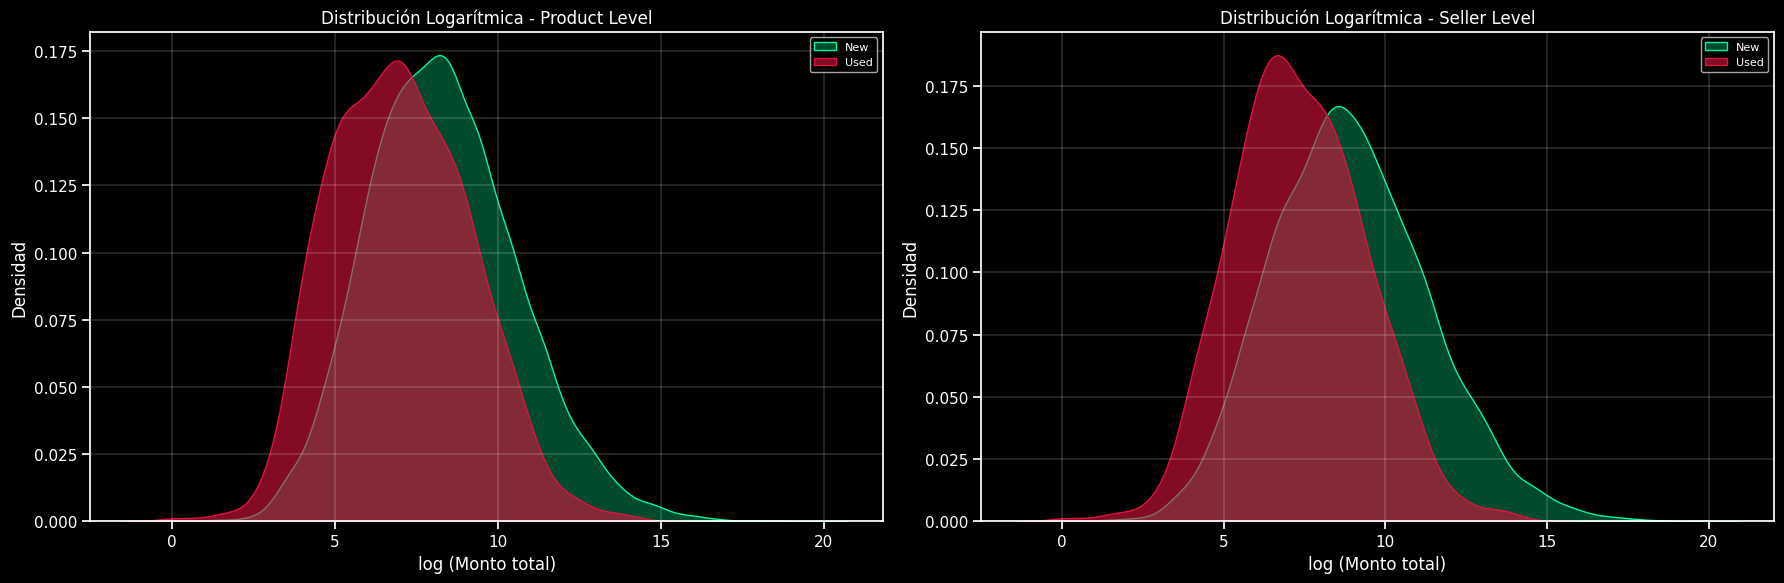

In [179]:
# Define mapping of dataframes and corresponding group columns
dataframes = {
    'Product Level': (df_product, 'product_id'),
    'Seller Level': (df_seller, 'seller_id')
}

fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # Create subplots for 3 dataframes

for ax, (title, (df, group_col)) in zip(axes, dataframes.items()):
    # Convert Polars to Pandas after aggregation
    df_plot = (
        df.group_by(group_col)
        .agg(
            pl.col('total_amount').first().alias('total_amount'),
            pl.col('condition').mode().first().alias('condition'),
        )
        .sort('total_amount', descending=True)
    ).to_pandas()

    # Apply log transformation to avoid log(0)
    df_plot['log_total_mount'] = np.log(df_plot['total_amount'])  # log(1 + x)

    # KDE for 'new' condition
    sns.kdeplot(
        data=df_plot[df_plot['condition'] == 'new'],
        x='log_total_mount',
        label='New',
        fill=True,
        alpha=0.3,
        color='mediumspringgreen',
        ax=ax
    )

    # KDE for 'used' condition
    sns.kdeplot(
        data=df_plot[df_plot['condition'] == 'used'],
        x='log_total_mount',
        label='Used',
        fill=True,
        alpha=0.6,
        color='crimson',
        ax=ax
    )

    # Customize subplot
    ax.set_title(f'Distribuci√≥n Logar√≠tmica - {title}')
    ax.set_xlabel('log (Monto total)')
    ax.set_ylabel('Densidad')
    ax.legend(fontsize=8)
    ax.grid(color='white', linewidth=0.2)

# Adjust layout
plt.tight_layout()
plt.show()

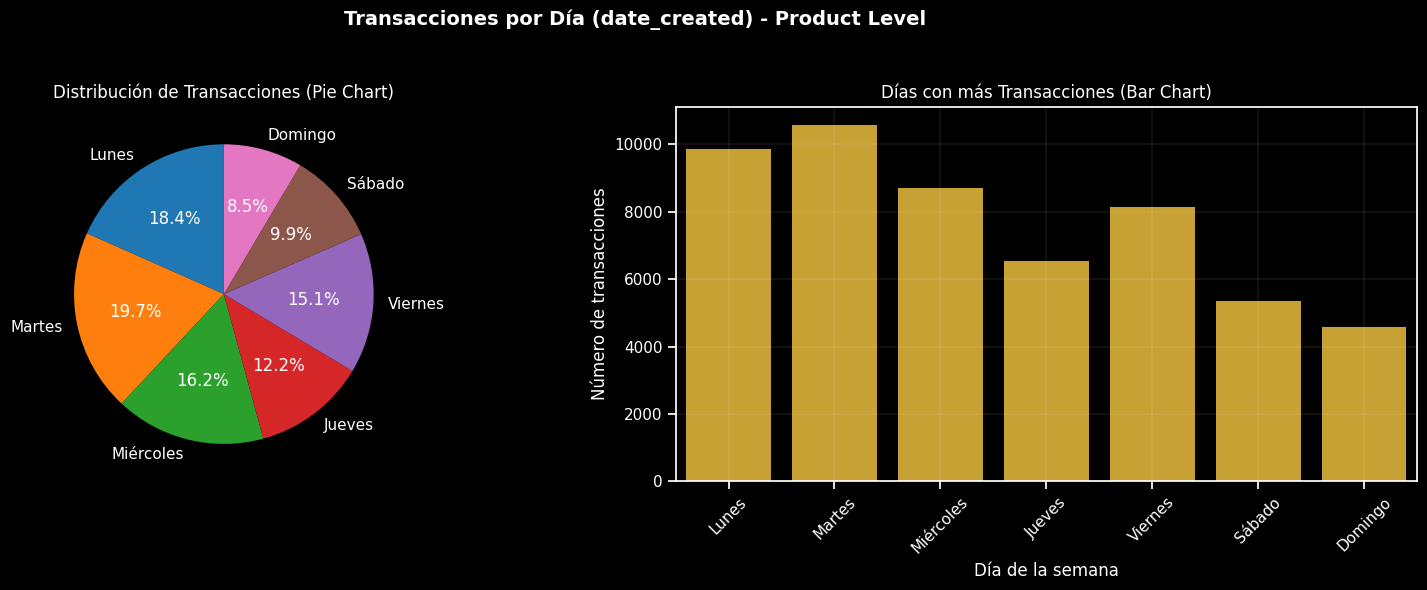

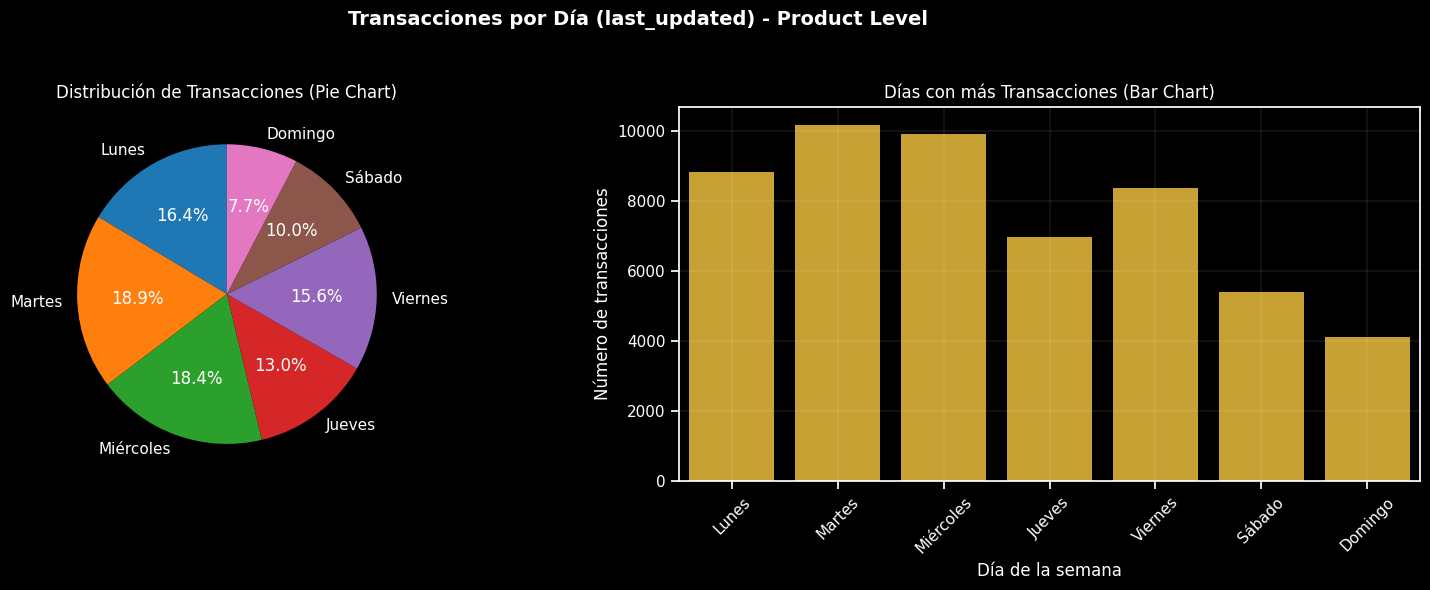

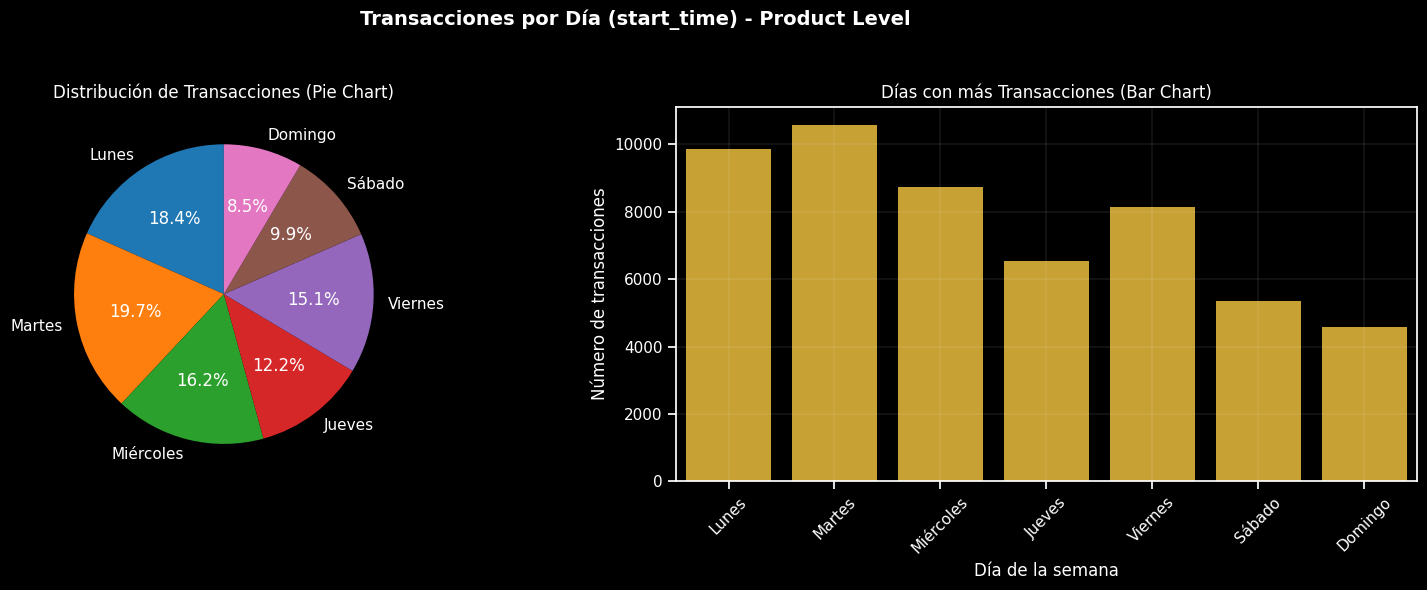

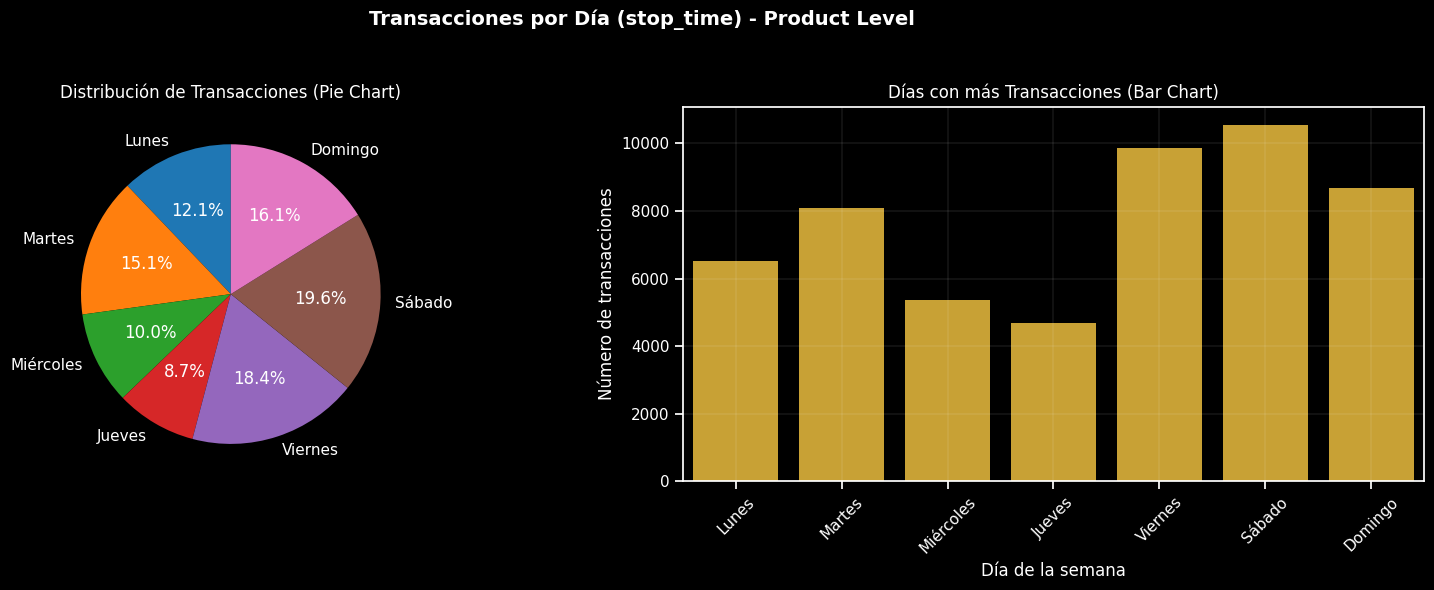

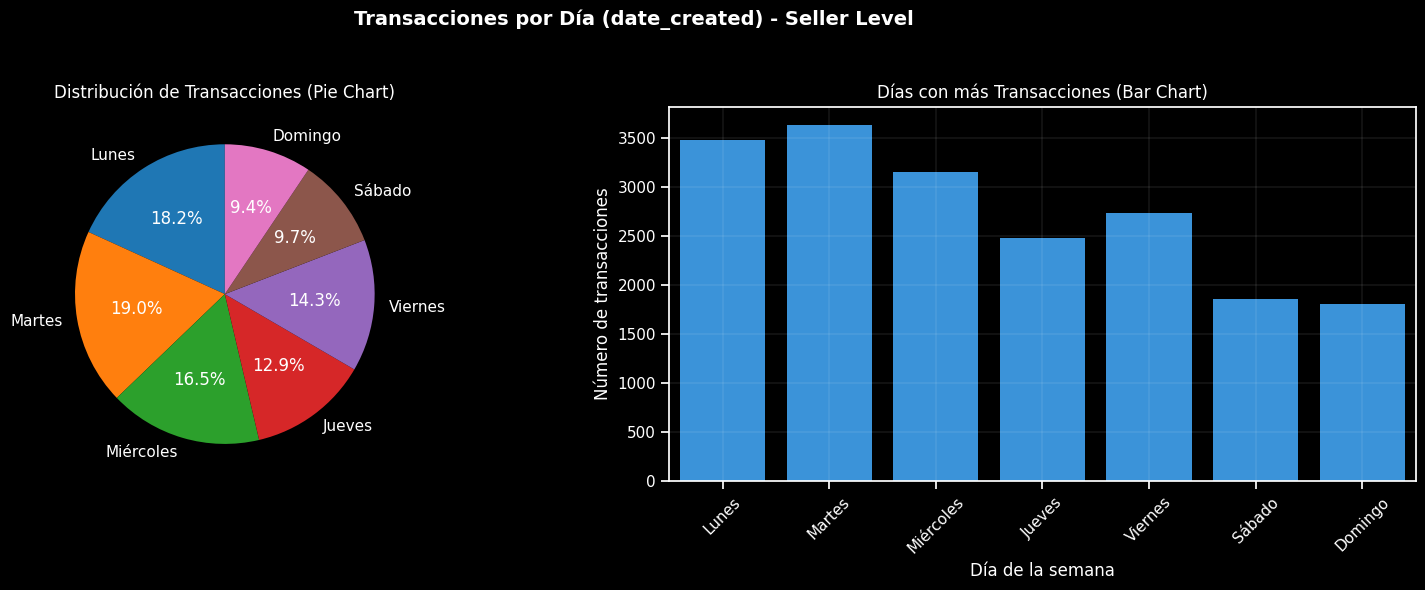

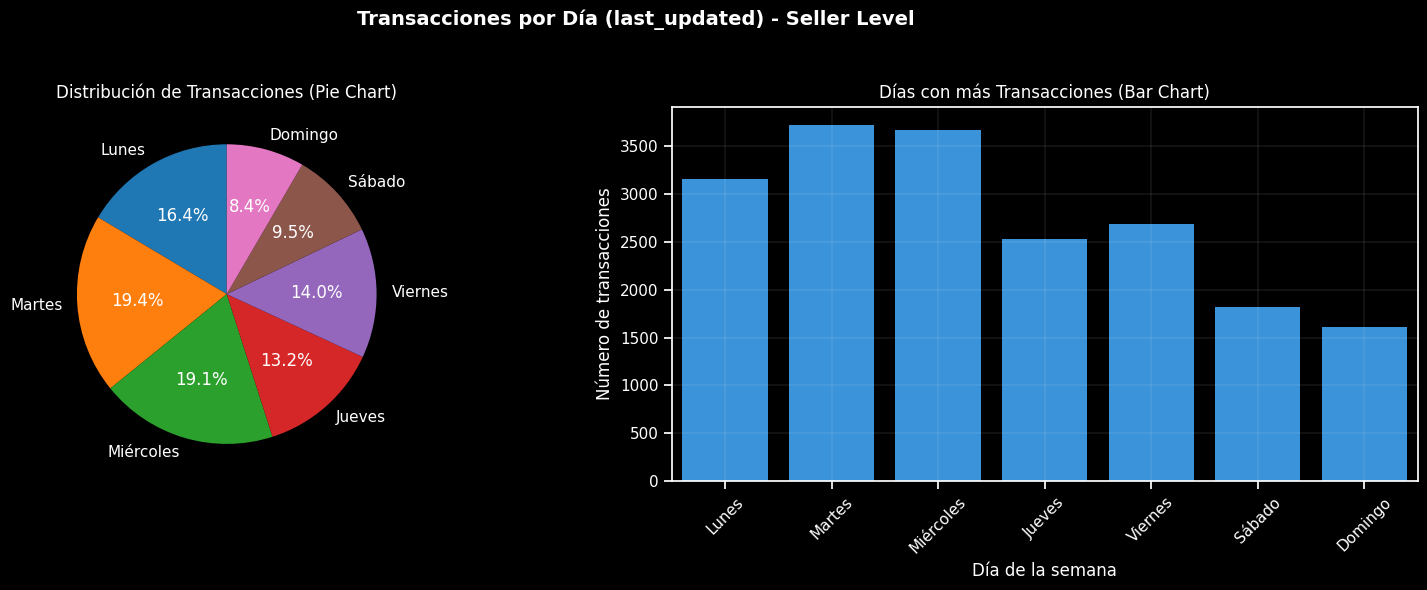

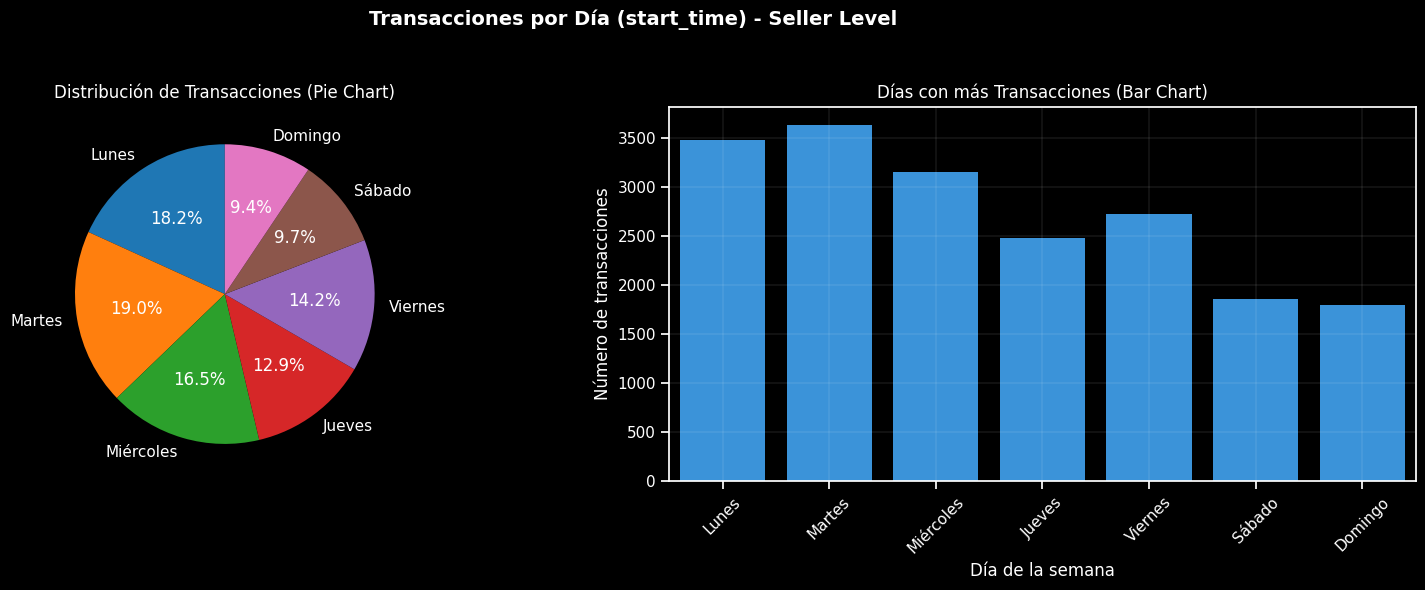

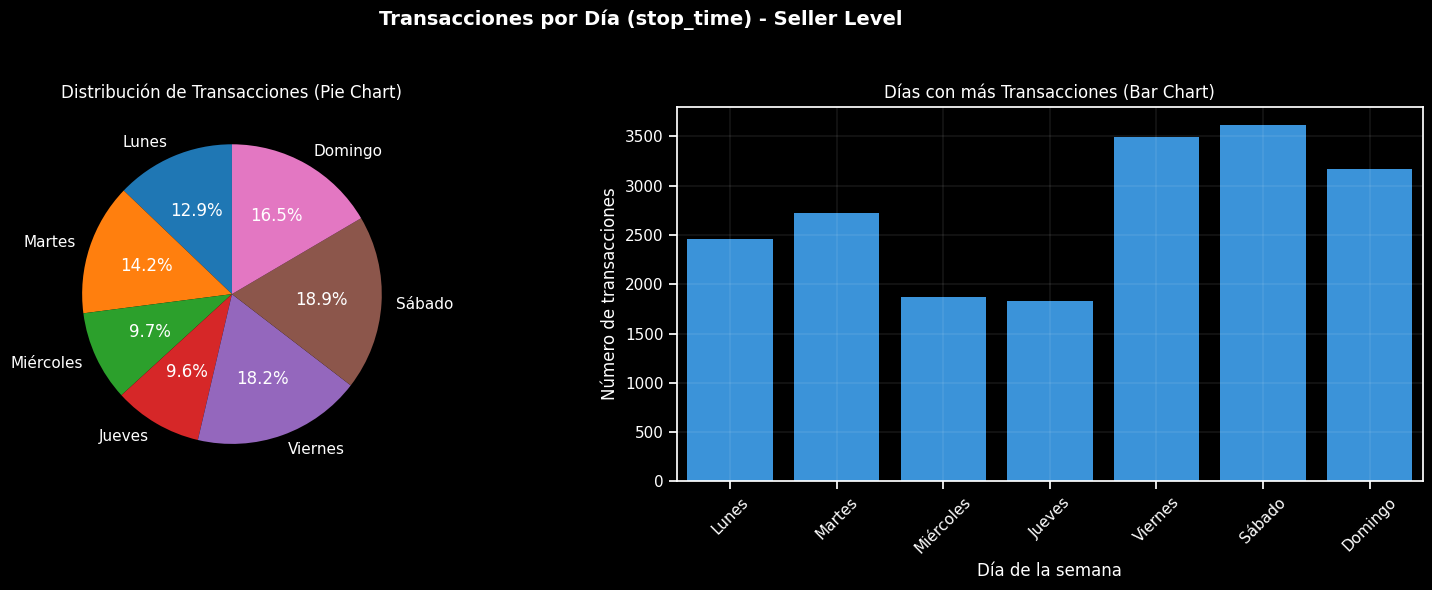

In [193]:
# Define mapping of dataframes and their corresponding colors
dataframes = {
    'Product Level': (df_product.to_pandas(), '#E0AC1C'),  # Yellow
    'Seller Level': (df_seller.to_pandas(), '#2196F3'),  # Blue
}

# List of time columns
time_cols = ['date_created', 'last_updated', 'start_time', 'stop_time']

# Day translation dictionary
day_translation = {
    'Monday': 'Lunes', 'Tuesday': 'Martes', 'Wednesday': 'Mi√©rcoles',
    'Thursday': 'Jueves', 'Friday': 'Viernes', 'Saturday': 'S√°bado', 'Sunday': 'Domingo'
}
day_order = ['Lunes', 'Martes', 'Mi√©rcoles', 'Jueves', 'Viernes', 'S√°bado', 'Domingo']

# Iterate over datasets
for title, (data, color) in dataframes.items():
    
    # Iterate over time columns
    for time_col in time_cols:
        
        # Create a figure with 2 subplots (Pie Chart + Bar Chart)
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        fig.suptitle(f'Transacciones por D√≠a ({time_col}) - {title}', fontsize=14, fontweight='bold')

        # Filter only 'new' condition
        df_filtered = data.loc[data['condition'] == 'new'].copy()

        # Extract the day of the week
        df_filtered['day_of_week'] = df_filtered[time_col].dt.day_name().map(day_translation)

        # Count occurrences for each day
        weekday_counts = df_filtered['day_of_week'].value_counts()
        weekday_counts = weekday_counts.reindex(day_order, fill_value=0)  # Ensure all days are included

        ## üìä Pie Chart ##
        axes[0].pie(
            weekday_counts,
            labels=weekday_counts.index,
            autopct='%1.1f%%',
            startangle=90,
            colors=sns.color_palette('tab10', len(weekday_counts))
        )
        axes[0].set_title('Distribuci√≥n de Transacciones (Pie Chart)', fontsize=12)

        ## üìà Bar Chart ##
        sns.barplot(
            x=weekday_counts.index,
            y=weekday_counts.values,
            order=day_order,
            color=color,
            ax=axes[1]
        )
        axes[1].set_title('D√≠as con m√°s Transacciones (Bar Chart)', fontsize=12)
        axes[1].set_xlabel('D√≠a de la semana')
        axes[1].set_ylabel('N√∫mero de transacciones')
        axes[1].tick_params(axis='x', rotation=45)
        axes[1].grid(color='white', linewidth=0.1)

        # Adjust layout and display
        plt.tight_layout(rect=[0, 0, 1, 0.95])  # Prevent overlap with title
        plt.show()

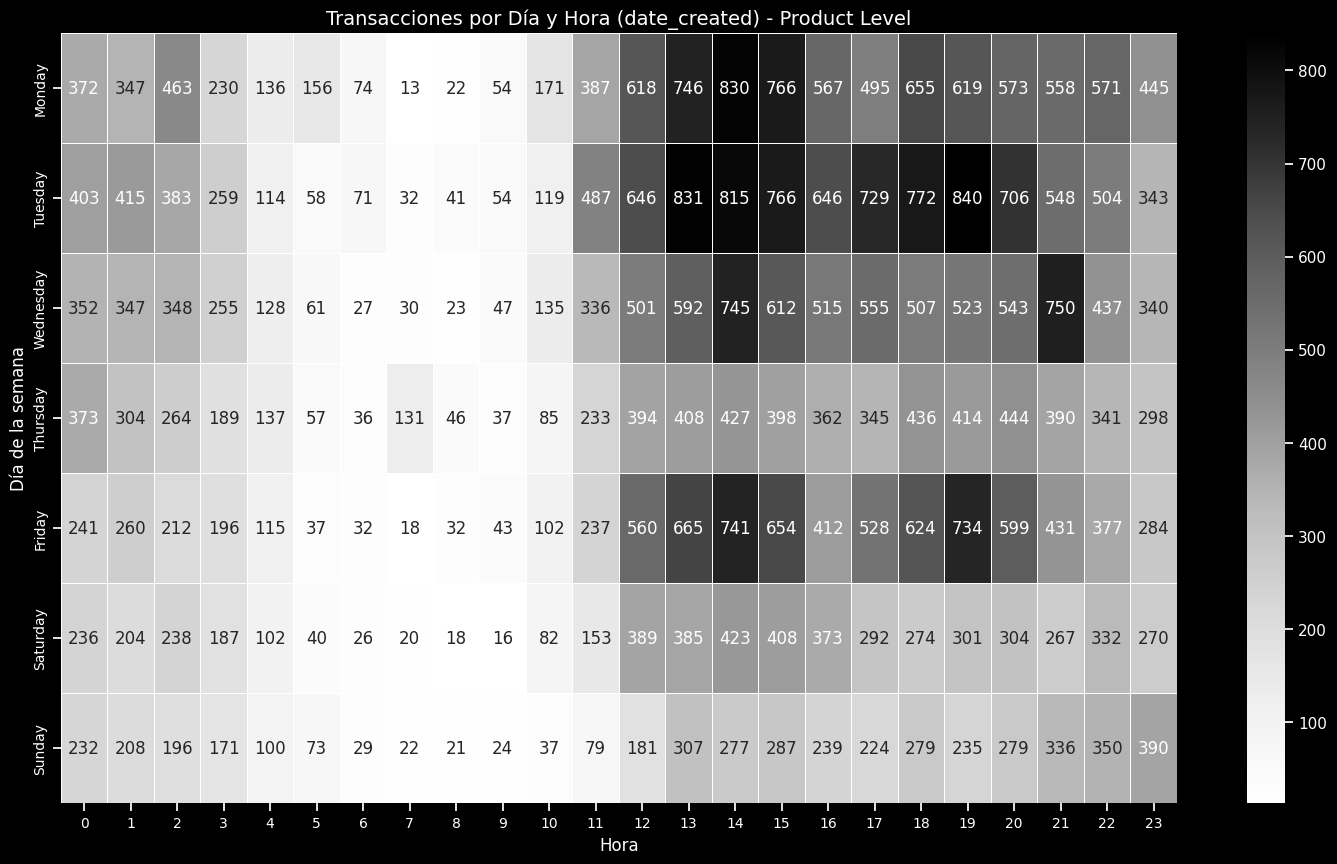

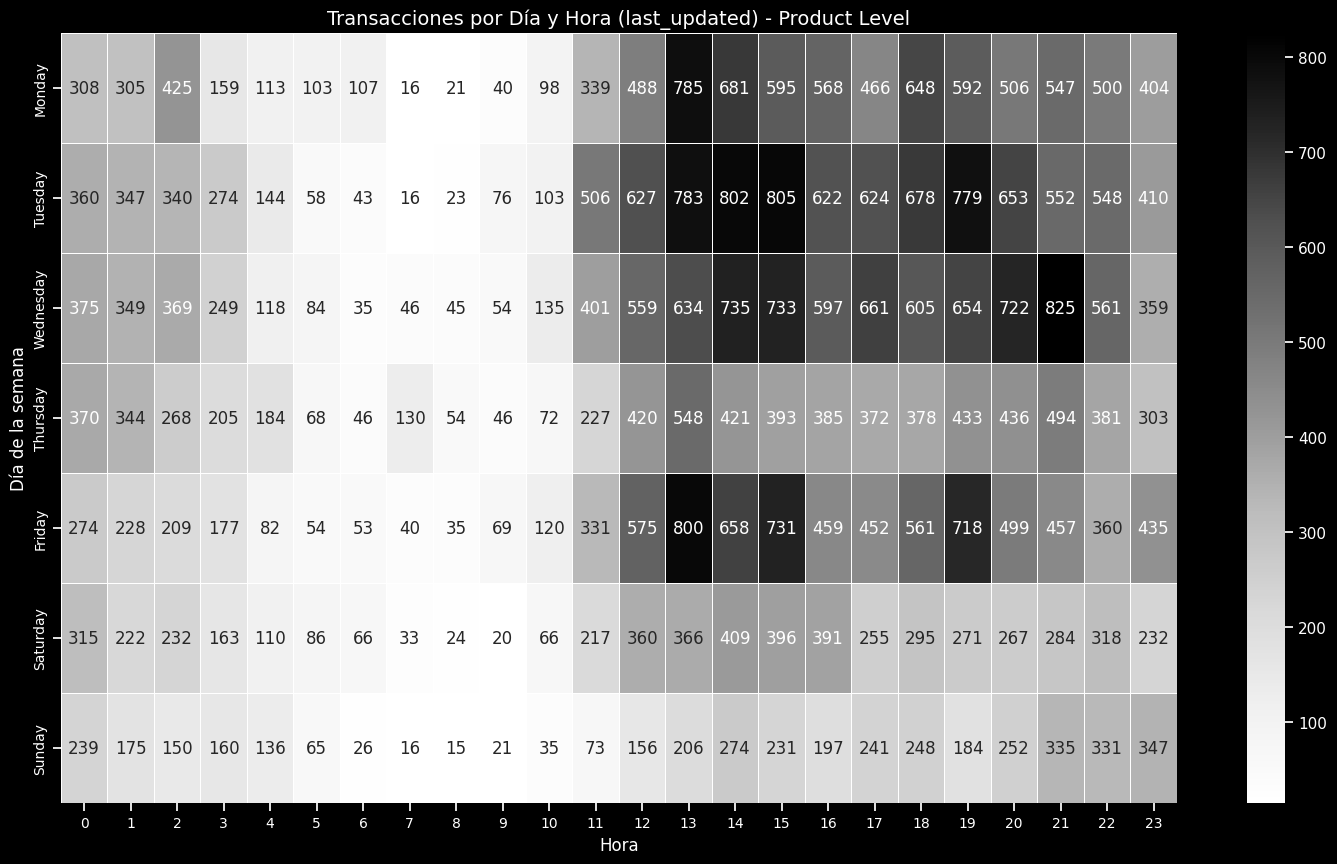

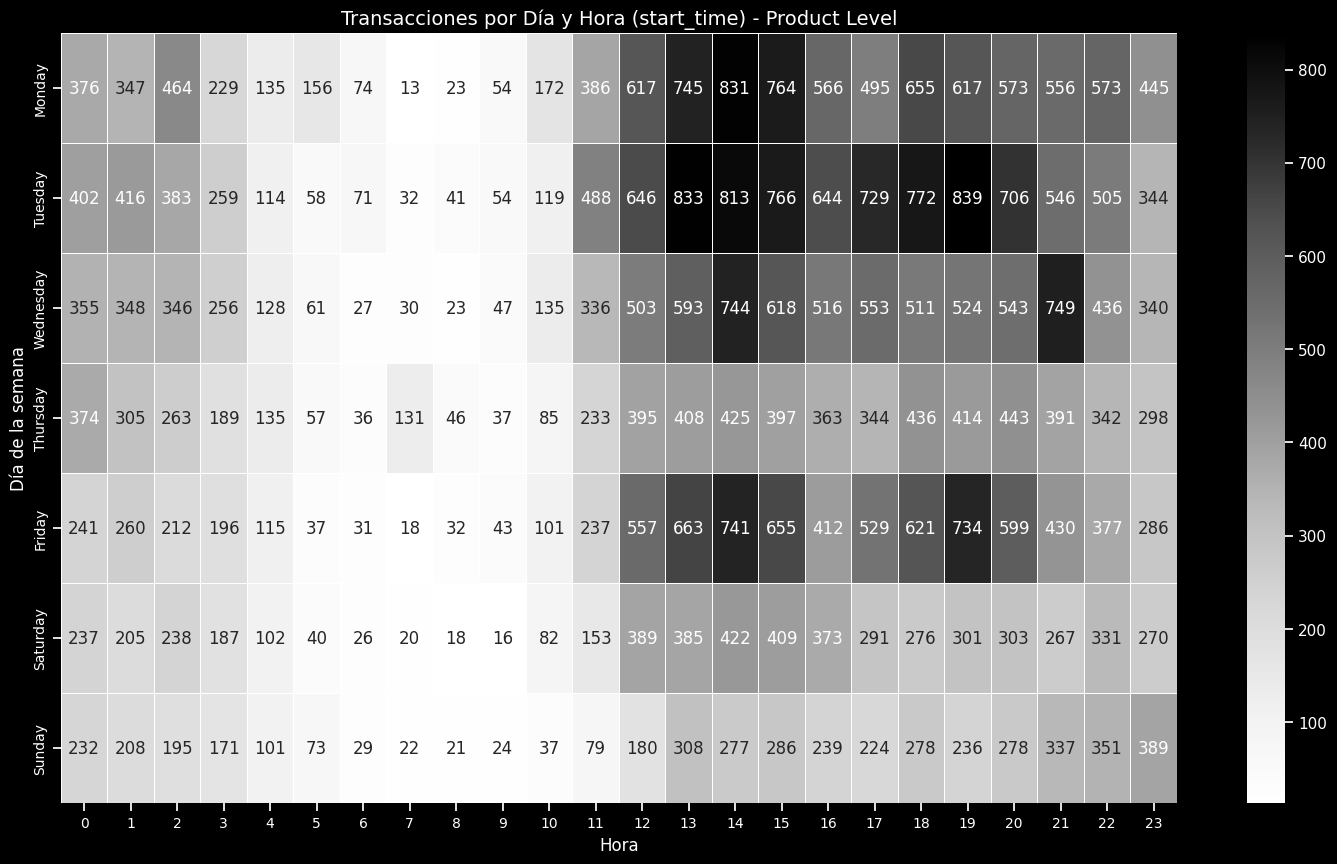

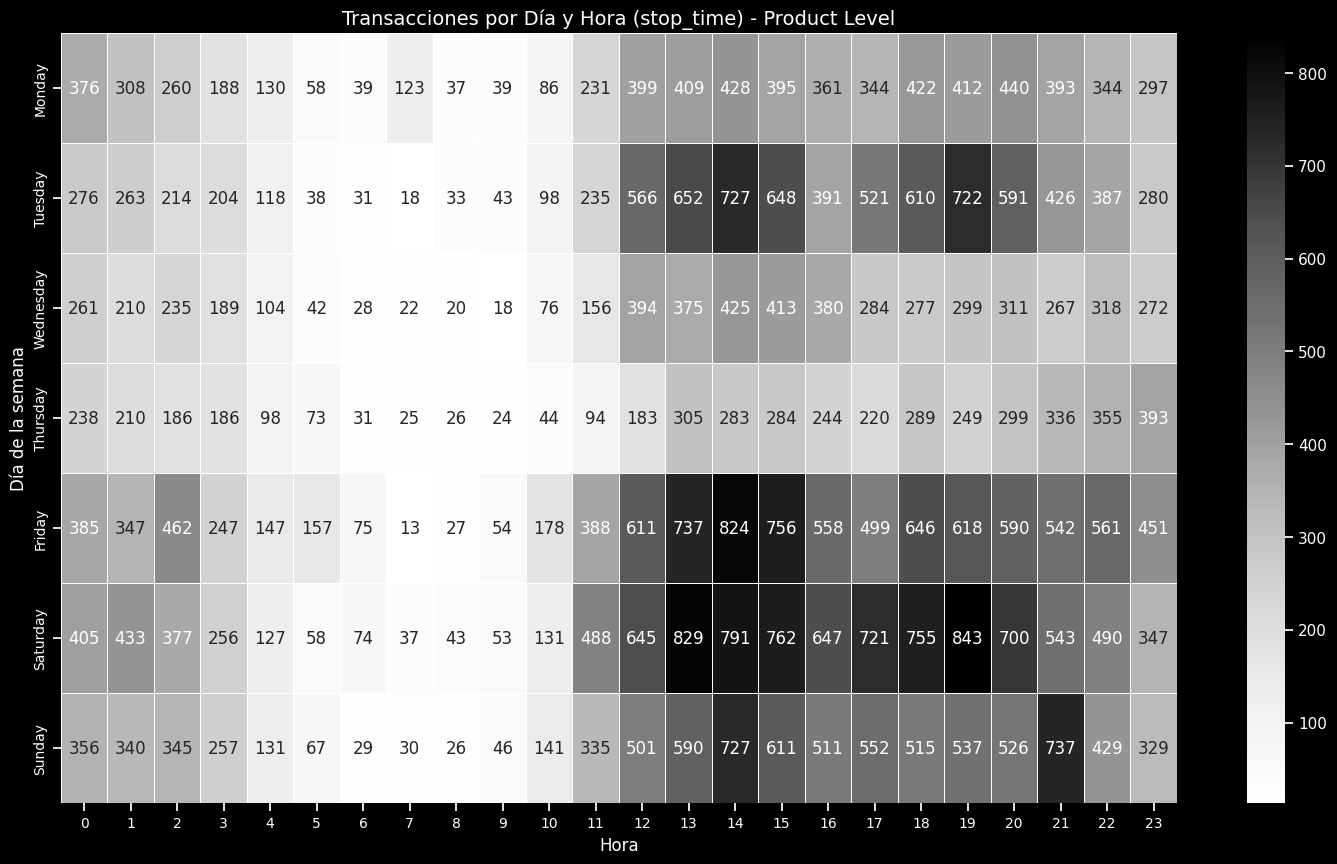

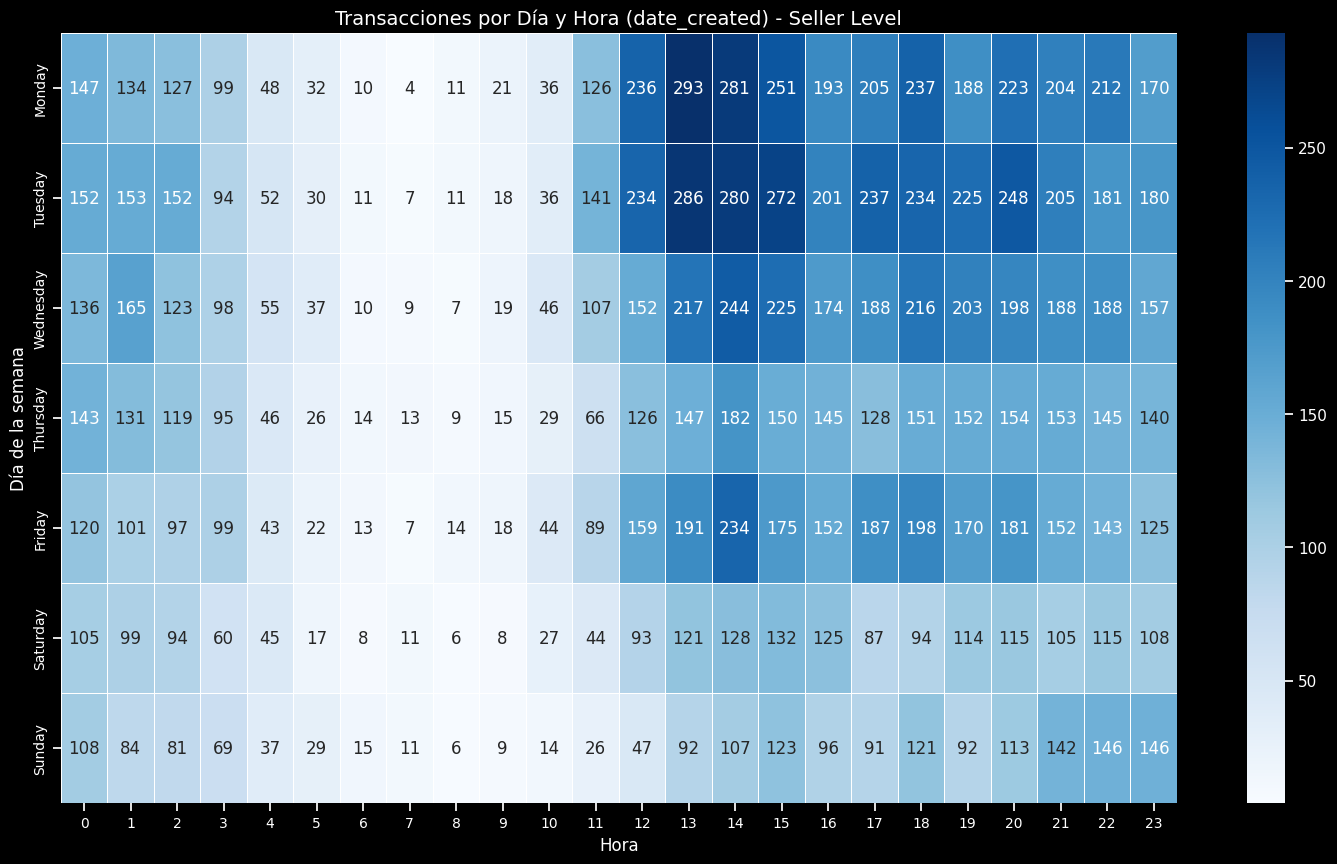

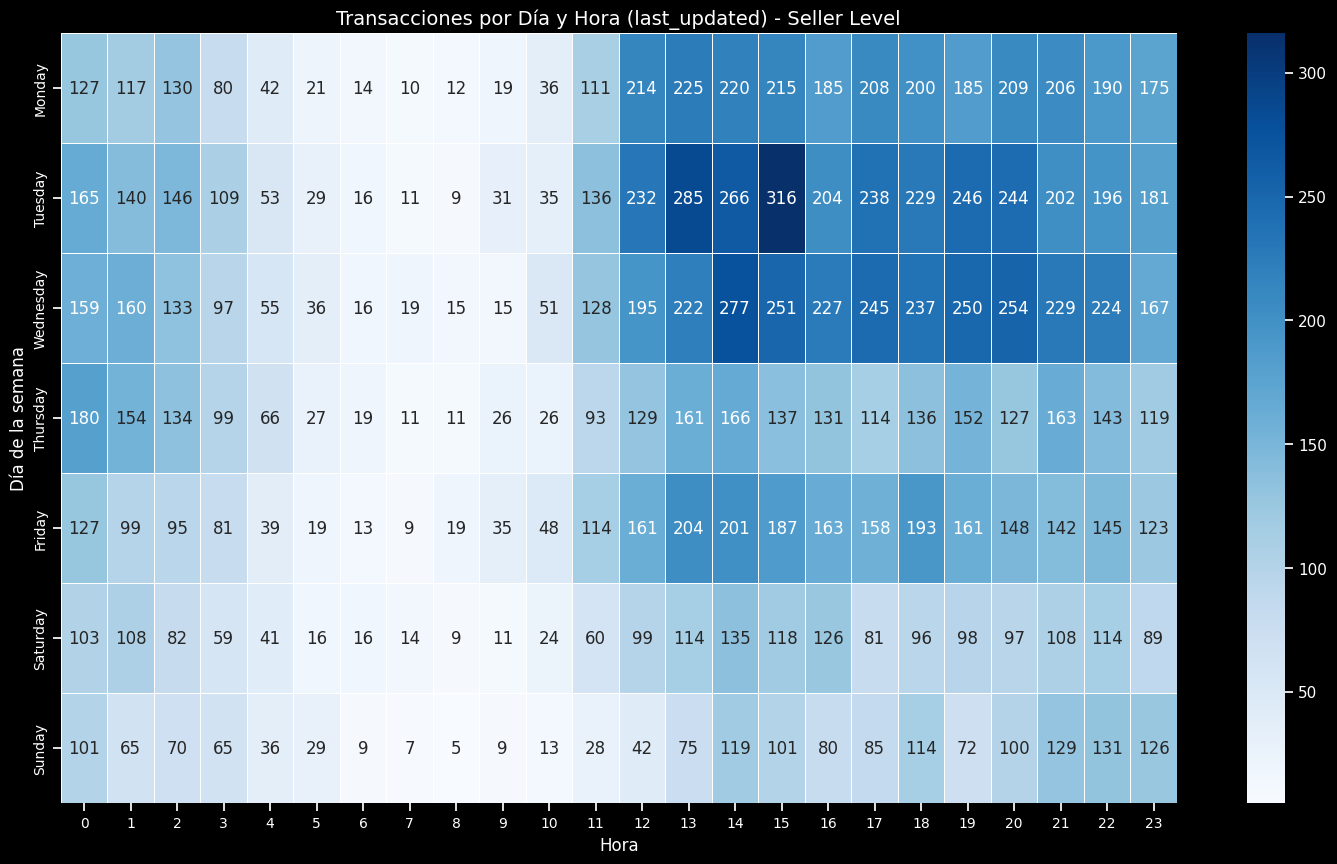

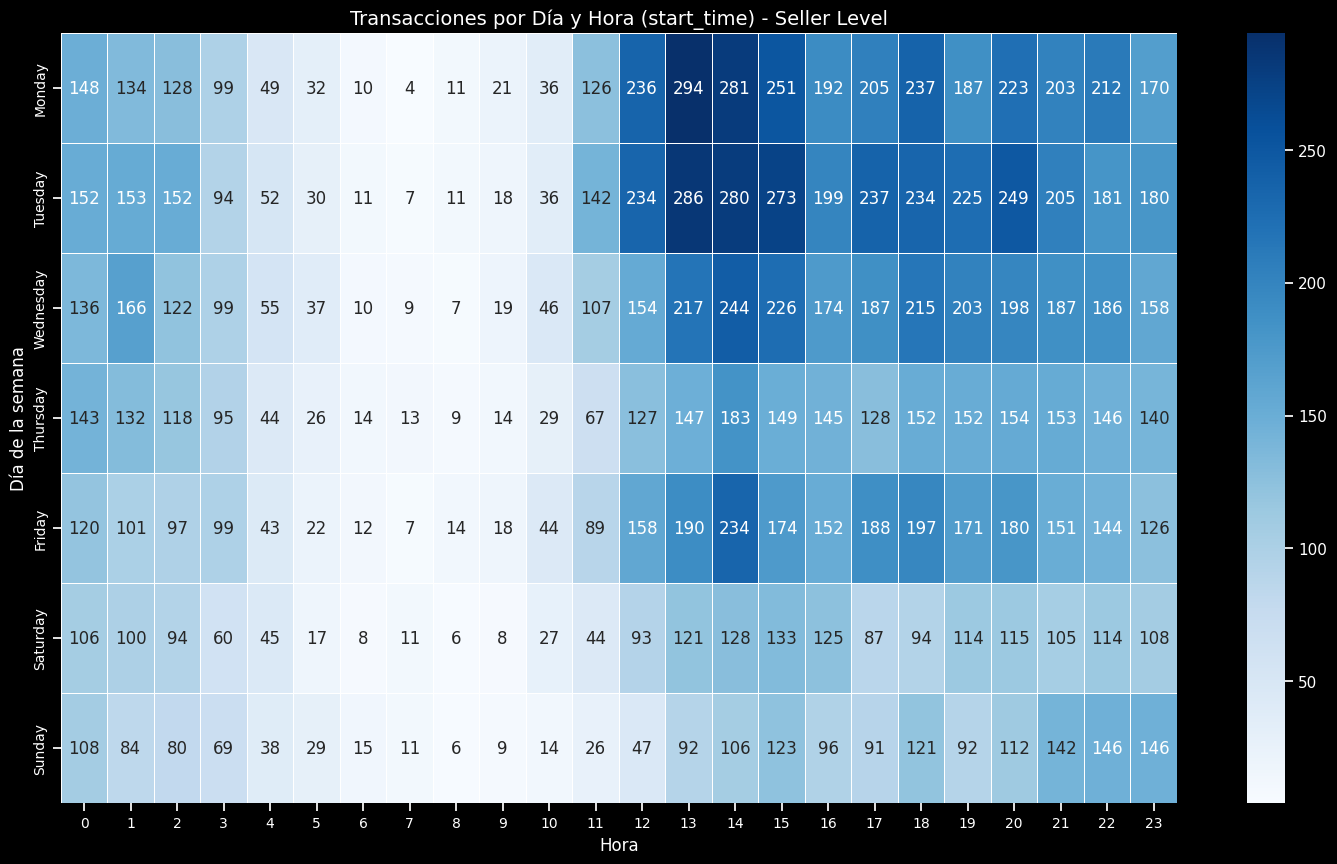

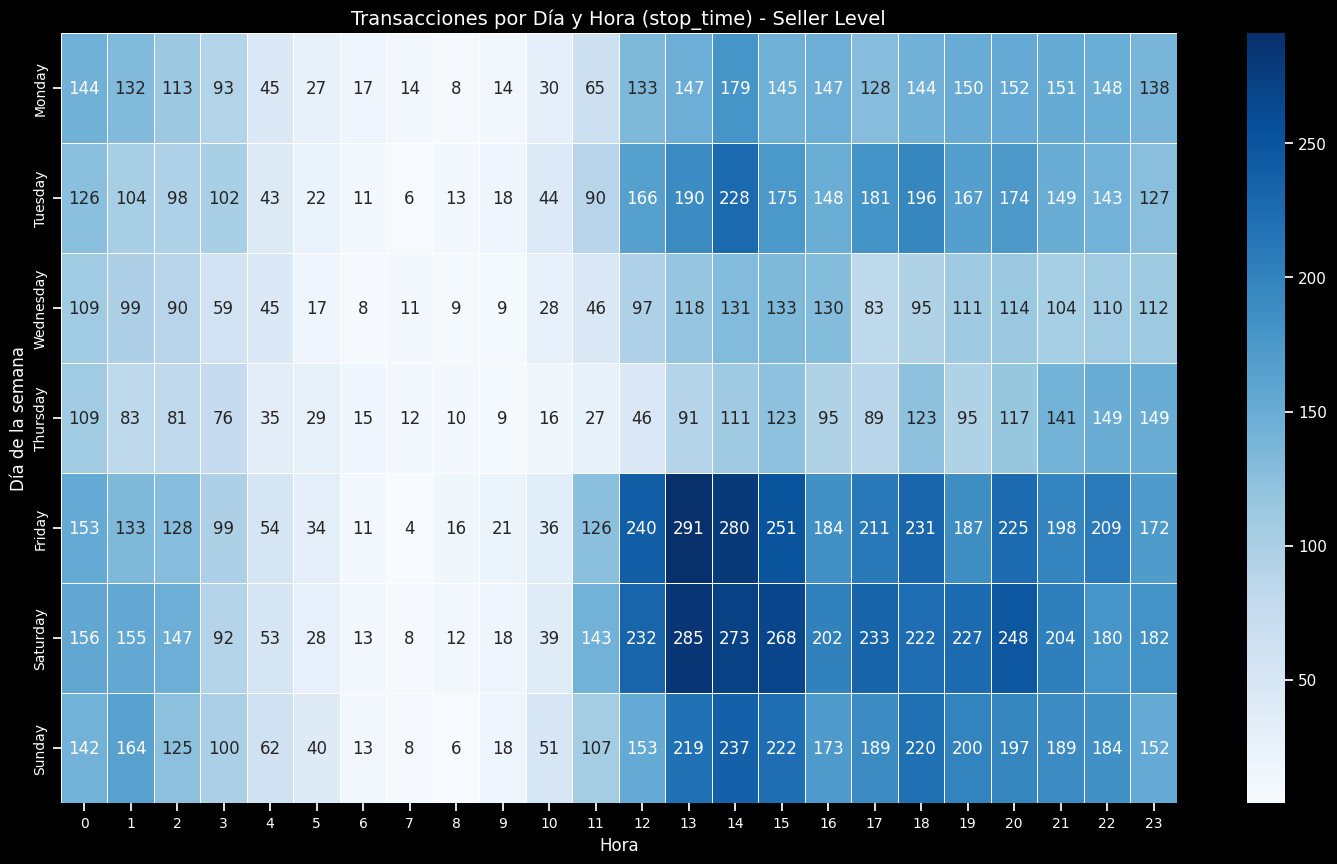

In [206]:

# Definir la lista de columnas temporales
time_cols = ['date_created', 'last_updated', 'start_time', 'stop_time']

# Diccionario de colores para cada nivel
colors = {
    "product": "Grays",  # Dorado suave
    "seller": "Blues",   # Azul suave
}

# Diccionario de nombres de los dataframes
dataframes = {
    "product": df_product.to_pandas(),
    "seller": df_seller.to_pandas(),
}

# Orden de los d√≠as de la semana
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Iterar sobre cada nivel y cada columna temporal
for level, df in dataframes.items():
    for time_col in time_cols:
        if time_col not in df.columns:
            continue  # Saltar si la columna no est√° en el dataframe

        # Filtrar solo productos nuevos
        df_filtered = df[df['condition'] == 'new']

        # Verificar si hay datos para evitar errores
        if df_filtered.empty:
            print(f"No hay datos para {time_col} en {level}")
            continue

        # Crear columnas adicionales para d√≠a de la semana y hora
        df_filtered = df_filtered.assign(
            day_of_week=df_filtered[time_col].dt.day_name(),
            hour=df_filtered[time_col].dt.hour
        )

        # Crear tabla cruzada (d√≠a de la semana vs hora)
        heatmap_data = pd.pivot_table( # type: ignore
            df_filtered,
            values='total_amount',  # Usa 'total_amount' para contar transacciones
            index='day_of_week',
            columns='hour',
            aggfunc='size', # type: ignore
            fill_value=0
        )

        # Reordenar los d√≠as de la semana
        heatmap_data = heatmap_data.reindex(day_order)

        # Graficar el heatmap
        plt.figure(figsize=(18, 10))
        sns.heatmap(
            heatmap_data,
            cmap=colors[level],  # Color seg√∫n el nivel
            annot=True,
            fmt='d',
            linewidths=.5
        )
        plt.title(f'Transacciones por D√≠a y Hora ({time_col}) - {level.capitalize()} Level', fontsize=14)
        plt.xlabel('Hora', fontsize=12)
        plt.ylabel('D√≠a de la semana', fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.show()
